In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
data_2 = pd.read_excel(r'C:\Users\Admin\Documents\Dry_Maize.xlsx')
data_2.head()

,Dates,Unit,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,...,Thika,Kajiado,Imenti,Garissa,Wajir,Marimanti,Meru,Bungoma,Makueni,Transmara
0,2014-01-01,Bag,90,3156.0,3000.000000,3600.0,2536.000000,2780.0,3600.00,2534.666667,...,0,0.0,0.0,0,0.0,0,0.0,0,0,0
1,2014-02-01,Bag,90,3230.0,2985.000000,3600.0,2500.000000,2744.5,3381.75,2522.500000,...,0,0.0,0.0,0,0.0,0,0.0,0,0,0
2,2014-03-01,Bag,90,3175.0,2966.666667,3600.0,2591.666667,3030.0,3420.00,2550.000000,...,0,0.0,0.0,0,0.0,0,0.0,0,0,0
3,2014-04-01,Bag,90,3150.0,2966.666667,3600.0,2591.666667,3000.0,3420.00,2600.000000,...,0,0.0,0.0,0,0.0,0,0.0,0,0,0
4,2014-05-01,Bag,90,3100.0,3100.000000,3740.0,0.000000,3130.0,3483.00,2925.000000,...,0,0.0,0.0,0,0.0,0,0.0,0,0,0


In [3]:
data_2.shape

(60, 33)

In [4]:
data_2.describe()

,Kg,Nairobi,Mombasa,Kisumu,Nakuru,Eldoret,Malindi,Kitale,Machakos,Embu,...,Thika,Kajiado,Imenti,Garissa,Wajir,Marimanti,Meru,Bungoma,Makueni,Transmara
count,60.0,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.000000,60.000000
mean,90.0,2955.834028,2904.781076,3430.988889,2423.183333,2624.102222,2617.417593,2125.234907,1012.916667,2383.466667,...,131.666667,1034.652778,1037.988889,766.666667,946.600000,40.000000,218.666667,0.0,45.000000,83.333333
std,0.0,568.304838,580.746144,623.636328,668.615320,762.468917,1239.233111,1099.089353,1404.425700,1038.619465,...,579.082169,1386.762624,1284.409665,1578.313482,1266.594238,309.838668,616.216266,0.0,348.568501,452.550837
min,90.0,1922.500000,1820.000000,2390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,90.0,2648.250000,2580.750000,3140.000000,2238.750000,2279.375000,2700.000000,1779.166667,0.000000,2209.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,90.0,2882.000000,2916.875000,3204.000000,2500.000000,2600.000000,3000.000000,2350.375000,0.000000,2600.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,90.0,3151.500000,3074.750000,3600.000000,2620.000000,2947.500000,3162.500000,2590.250000,2681.250000,2908.250000,...,0.000000,2700.000000,2312.500000,0.000000,2500.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,90.0,4704.000000,4898.000000,5200.000000,4000.000000,4456.000000,4500.000000,4446.666667,3250.000000,4650.000000,...,2750.000000,3416.666667,3650.000000,4500.000000,3000.000000,2400.000000,2300.000000,0.0,2700.000000,2500.000000


In [5]:
data = data_2[['Nairobi','Mombasa']].copy()
data.head()

,Nairobi,Mombasa
0,3156.0,3000.000000
1,3230.0,2985.000000
2,3175.0,2966.666667
3,3150.0,2966.666667
4,3100.0,3100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nairobi  60 non-null     float64
 1   Mombasa  60 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [7]:
data['Date'] = pd.to_datetime(data_2['Dates'])
data.set_index('Date', inplace=True)

In [8]:
#Create columns Year and Month which will be used for data visualisation
data['Year'] = data.index.year
data['Month'] = data.index.month

Plotting Nairobi time series data

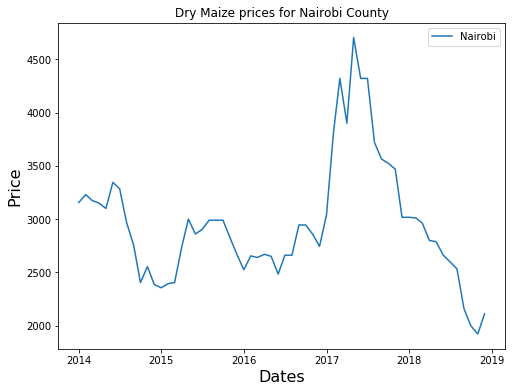

In [23]:
plt.figure(figsize=(8,6))
plt.plot(data.Nairobi, label='Nairobi')
plt.title('Dry Maize prices for Nairobi County')
plt.ylabel('Price', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.grid(False)
plt.legend()
plt.show()

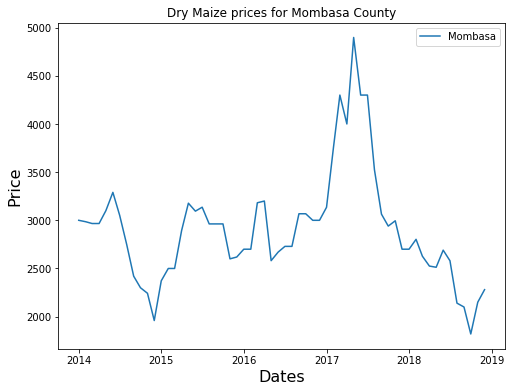

In [24]:
plt.figure(figsize=(8,6))
plt.plot(data.Mombasa, label='Mombasa')
plt.title('Dry Maize prices for Mombasa County')
plt.ylabel('Price', fontsize=16)
plt.xlabel('Dates', fontsize=16)
plt.grid(False)

plt.legend()
plt.show()

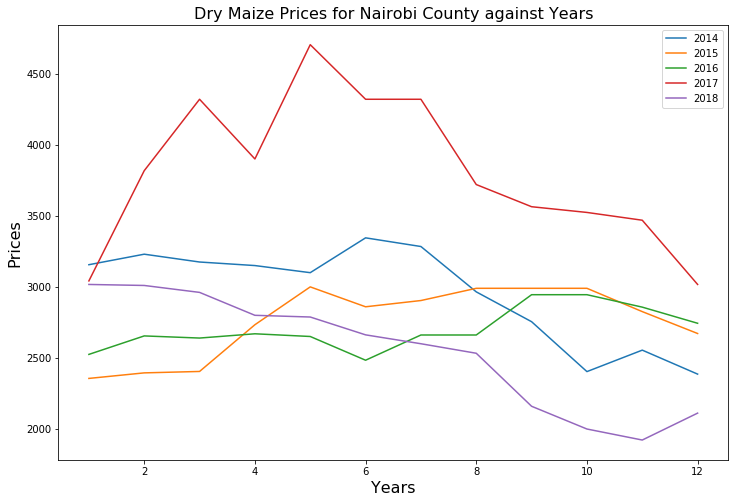

In [11]:
years = data['Year'].unique()
plt.figure(figsize=(12,8))
for i, y in enumerate (years):
    plt.plot('Month', 'Nairobi', data=data.loc[data.Year==y,:], label=y )
    #plt.text(data.loc[data.Year==y,:].shape[0]-.9, data.loc[data.Year==y, 'Nairobi'][-1:].values[0],y, fontsize=20)
    
plt.title('Dry Maize Prices for Nairobi County against Years', fontsize=16)
plt.ylabel('Prices', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.grid(False)

plt.legend()
plt.show()

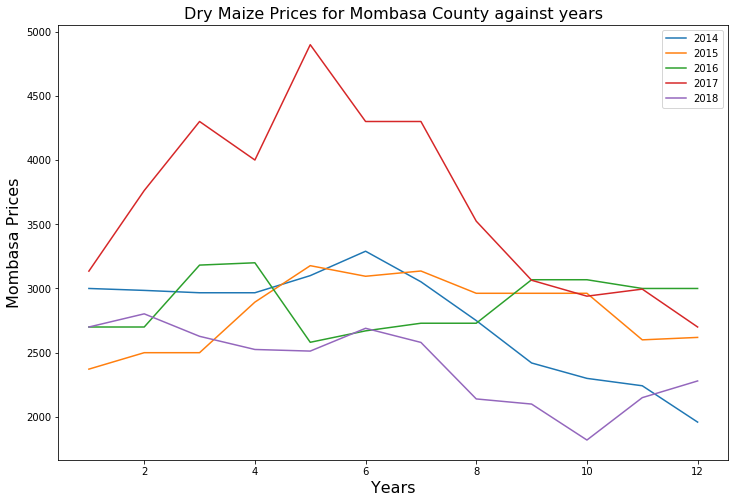

In [12]:
years = data['Year'].unique()
plt.figure(figsize=(12,8))
for i, y in enumerate (years):
    plt.plot('Month', 'Mombasa', data=data.loc[data.Year==y,:], label=y )
    #plt.text(data.loc[data.Year==y,:].shape[0]-.9, data.loc[data.Year==y, 'Nairobi'][-1:].values[0],y, fontsize=20)
    
plt.title('Dry Maize Prices for Mombasa County against years', fontsize=16)
plt.ylabel('Mombasa Prices', fontsize=16)
plt.xlabel('Years', fontsize=16)
plt.grid(False)

plt.legend()
plt.show()

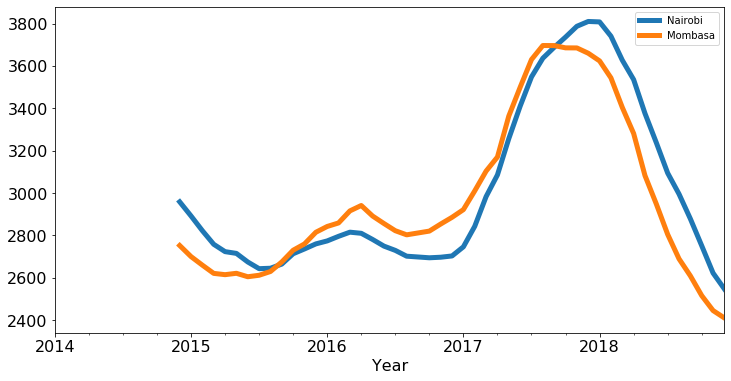

In [13]:
Nairobi = data['Nairobi']
Mombasa = data['Mombasa']

df_rolmean = pd.concat([Nairobi.rolling(12).mean(), Mombasa.rolling(12).mean()], axis=1)
df_rolmean.plot(figsize=(12,6),linewidth=5, fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

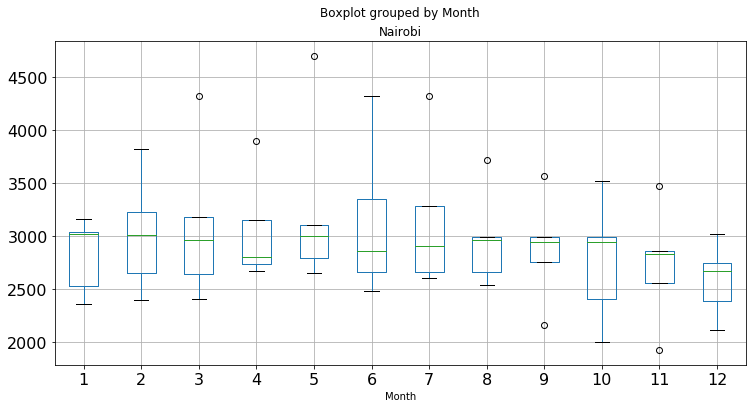

In [14]:
#Seasonality by boxplots
data.boxplot(column='Nairobi', by='Month', figsize=(12,6), fontsize=16)
plt.show()

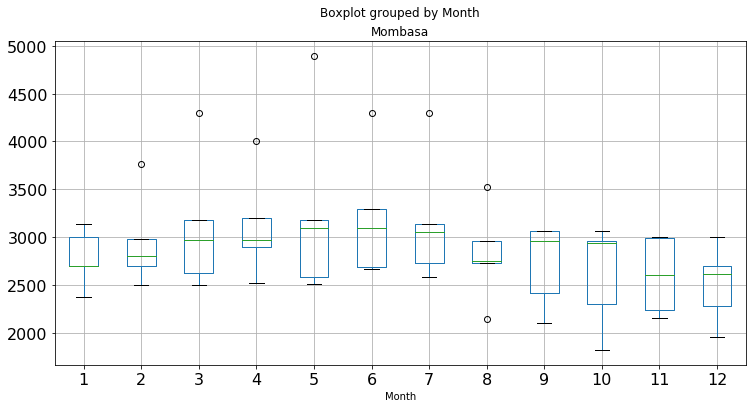

In [15]:
data.boxplot(column='Mombasa', by='Month', figsize=(12,6), fontsize=16)
plt.show()

DECOMPOSING THE RESULTS

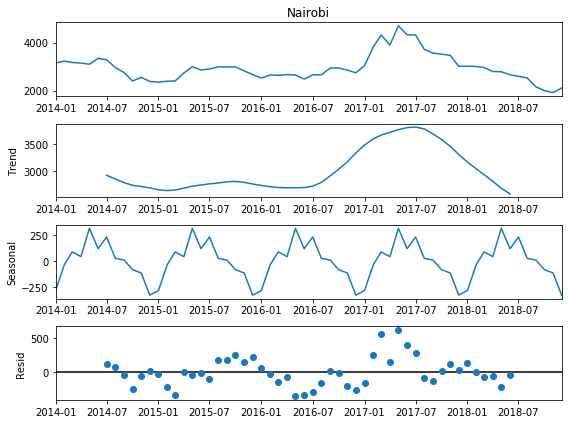

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = (8,6)

decomp_results = seasonal_decompose(data['Nairobi'], period=12, model='additive')
type(decomp_results)

decomp_results.plot()
plt.show()

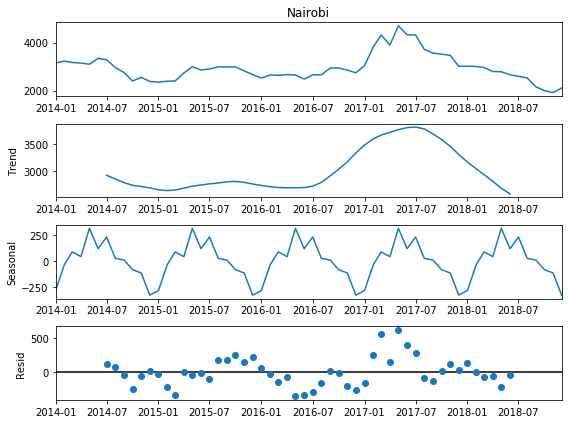

In [17]:
decomp_results = seasonal_decompose(data['Nairobi'], period=12, model='additive')
type(decomp_results)

decomp_results.plot()
plt.show()

CORRELATION

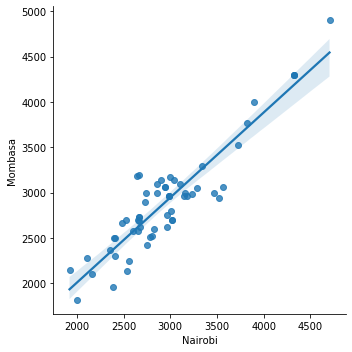

In [18]:
sns.lmplot(x='Nairobi', y='Mombasa',fit_reg=True, data=data)

In [19]:
data_corr = data_2[['Dates','Nairobi','Mombasa']].copy()
data_corr.corr()

,Nairobi,Mombasa
Nairobi,1.000000,0.917588
Mombasa,0.917588,1.000000
